# Credit Card Clustering Analysis

## Introduction

This project aims to develop customer segmentation to define marketing strategy for a credit card company. The dataset used for analysis summarizes the usage behavior of approximately 9000 active credit card holders over the last 6 months. The dataset consists of 18 behavioral variables recorded at a customer level.

### Dataset Information

The dataset used for this analysis is sourced from Kaggle and can be found [here](https://www.kaggle.com/datasets/arjunbhasin2013/ccdata).

### Data Dictionary

- **CUST_ID**: Identification of Credit Card holder (Categorical)
- **BALANCE**: Balance amount left in the account to make purchases
- **BALANCE_FREQUENCY**: How frequently the Balance is updated (score between 0 and 1, where 1 = frequently updated, 0 = not frequently updated)
- **PURCHASES**: Amount of purchases made from the account
- **ONEOFF_PURCHASES**: Maximum purchase amount done in one-go
- **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment
- **CASH_ADVANCE**: Cash in advance given by the user
- **PURCHASES_FREQUENCY**: How frequently the Purchases are being made (score between 0 and 1, where 1 = frequently purchased, 0 = not frequently purchased)
- **ONEOFFPURCHASESFREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- **PURCHASESINSTALLMENTSFREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- **CASHADVANCEFREQUENCY**: How frequently the cash in advance is being paid
- **CASHADVANCETRX**: Number of Transactions made with "Cash in Advanced"
- **PURCHASES_TRX**: Number of purchase transactions made
- **CREDIT_LIMIT**: Limit of Credit Card for the user
- **PAYMENTS**: Amount of Payment done by the user
- **MINIMUM_PAYMENTS**: Minimum amount of payments made by the user
- **PRCFULLPAYMENT**: Percent of full payment paid by the user
- **TENURE**: Tenure of credit card service for the user

### Dependencies

In [1]:
# Import pandas library for data manipulation and analysis.
import pandas as pd  

# Import seaborn library for statistical data visualization.
import seaborn as sns  

# Import matplotlib.pyplot for creating static, interactive, and animated visualizations.
import matplotlib.pyplot as plt  


## 1. Data understanding and preparation

### 1.1 Data Loading

In [2]:
# URL of the dataset on GitHub
url = 'https://github.com/kjellrkri/Portfolio/raw/main/Credit%20Card%20Clustering%20Analysis/CC%20GENERAL.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Display descriptive info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Data characteristics:**

* All features are numerical, simplifying distance calculations for clustering algorithms.
* The number of observations (8636) is sufficient for most clustering algorithms.

### 1.2 Data Cleaning: Checking Datatypes and Handeling Incorrect Types

In [4]:
# Check data types of columns
print(df.dtypes)

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


**Dataframe datatypes:**
* The 'CUST_ID' column contains alphanumeric identifiers for customers and should be converted to string data type for computational efficiency.
* The remaining columns have appropriate datatypes.

In [5]:
# Convert 'CUST_ID' column from object to string
df['CUST_ID'] = df['CUST_ID'].astype("string")

# Check if datatype has been converted successfully
print(df.dtypes)


CUST_ID                              string
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object


### 1.3 Data Cleaning: Handling Missing Values

In [6]:
# Check for missing values
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


**Missing values in MINIMUM_PAYMENTS**:  
The "CREDIT_LIMIT" column has one missing value, while the "MINIMUM_PAYMENTS" column has 313 missing values. Considering the dataset's size of 8950 rows, the occurrence of 313 missing values in the "MINIMUM_PAYMENTS" column represents approximately 3.5% of the total dataset, which is relatively low.  
**Handling of the missing values**:  
An appropriate course of action would be to drop the rows with missing values in order to preserve data integrity and ensure the quality of subsequent analyses. Since the percentage of missing values is relatively small, dropping these rows is unlikely to significantly impact the overall dataset's representativeness or skew the analysis results.

In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

# Check if removal of missing values was successfull
print(df.isnull().sum())


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


### 1.4 Data Cleaning: Handling Duplicates

In [8]:
# Check for duplicates
print(df.duplicated().sum())

0


There are no duplicate entries in the data set.

## 2. Exploratory Data Analysis (EDA)

### 2.1 Summary statistics

In [9]:
# Perform summary statistics for the first half of the columns
df.iloc[:, :len(df.columns)//2].describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000


In [10]:
# Perform summary statistics for the remaining half of the columns
df.iloc[:, len(df.columns)//2:].describe()


,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Findings summary statistics**

**1. Data Distribution and Potential Outliers:**

* The presence of significant maximum values compared to the mean and median for features like "BALANCE," "PURCHASES," "ONEOFF_PURCHASES," and "CASH_ADVANCE" suggests the possibility of outliers in the data. These outliers could significantly impact clustering algorithms, so further investigation and potential data cleaning might be necessary.

**2. Scaling Features for Clustering:**

* **Scaling:** Clustering algorithms are often sensitive to the scale of features. As observed in the descriptive statistics, features like "BALANCE" (mean: 1601, std: 2095) have significantly larger scales compared to features like "BALANCE_FREQUENCY" (mean: 0.89, std: 0.21). This can lead to features with larger scales dominating the distance calculations used in clustering, potentially masking valuable insights from features with smaller scales. To address this, **scaling features** like min-max scaling or standardization (z-score normalization) is recommended. This ensures all features contribute equally to the distance calculations, leading to more reliable and interpretable clustering results.

**3. Normalization for Non-Normal Distributions:**

* While not explicitly shown, the presence of significant maximum values compared to the mean and median for several features suggests the possibility of **skewed distributions**. Clustering algorithms that assume normality might be negatively impacted by such distributions. **Normalization techniques** like standardization can address this issue by transforming the features to have a normal distribution, improving the effectiveness of these algorithms.

**4. Limited Customer Tenure:**  
* The tenure seems to have a limited range, with all quartiles and the maximum value being 12. This suggests that most customers in the dataset have held their credit cards for a relatively short period (around 1 year). This limited range of tenure might restrict the analysis from looking into understanding how credit card usage patterns evolve over a longer period.


In [11]:
# Select only numerical features
numerical_columns = df.select_dtypes(include='number')

# Calculate CV for each numerical feature
print("Coefficient of Variation (CV) for each column:")
for col in numerical_columns.columns:
  # Calculate standard deviation
  std = df[col].std()
  # Calculate CV
  cv = std / df[col].mean()
  print(f"CV for '{col}': {cv:.2f}")

Coefficient of Variation (CV) for each column:
CV for 'BALANCE': 1.31
CV for 'BALANCE_FREQUENCY': 0.23
CV for 'PURCHASES': 2.11
CV for 'ONEOFF_PURCHASES': 2.78
CV for 'INSTALLMENTS_PURCHASES': 2.18
CV for 'CASH_ADVANCE': 2.13
CV for 'PURCHASES_FREQUENCY': 0.81
CV for 'ONEOFF_PURCHASES_FREQUENCY': 1.46
CV for 'PURCHASES_INSTALLMENTS_FREQUENCY': 1.08
CV for 'CASH_ADVANCE_FREQUENCY': 1.47
CV for 'CASH_ADVANCE_TRX': 2.09
CV for 'PURCHASES_TRX': 1.67
CV for 'CREDIT_LIMIT': 0.81
CV for 'PAYMENTS': 1.63
CV for 'MINIMUM_PAYMENTS': 2.75
CV for 'PRC_FULL_PAYMENT': 1.86
CV for 'TENURE': 0.11


***Feature Groups by Coefficient of Variation (CV)***:  
Based on the calculated CVs, we can group the features into two categories  

**Low Variance Features (CV <= 1):**

* *TENURE (CV: 0.11)*
* *CREDIT_LIMIT (CV: 0.81)*
* *BALANCE_FREQUENCY (CV: 0.23)*
* *PURCHASES_FREQUENCY (CV: 0.81)*

**High Variance Features (CV > 1):**

* *BALANCE (CV: 1.31)*
* *PURCHASES (CV: 2.11)*
* *ONEOFF_PURCHASES (CV: 2.78)*
* *INSTALLMENTS_PURCHASES (CV: 2.18)*
* *CASH_ADVANCE (CV: 2.13)*
* *CASH_ADVANCE_TRX (CV: 2.09)*
* *PURCHASES_TRX (CV: 1.67)*
* *MINIMUM_PAYMENTS (CV: 2.75)*
* *PRC_FULL_PAYMENT (CV: 1.86)*
* *CASH_ADVANCE_FREQUENCY (CV: 1.47)*  
* *PURCHASES_INSTALLMENTS_FREQUENCY (CV: 1.08)*  

**Implications for Clustering and EDA:**

* **Low variance features:**
These features have minimal variation across the dataset and might not contribute much to distinguishing different clusters. Including low variance features in clustering can introduce noise and  lead to clusters that are not well separated. However, they could still be relevant for further EDA tasks like understanding the overall characteristics of the data.

* **High variance features:** 
These features offer more potential for capturing meaningful differences between customer groups in a clustering analysis. They exhibit a wider spread in the data, allowing the clustering algorithm to identify patterns based on the nuanced patterns in these variations. However, extremely high CVs can sometimes signal the presence of outliers, which could impede the clustering process. Identifying and addressing potential outliers through techniques like winsorization or removal might be necessary before incorporating such features into the clustering analysis.

CV measures the relative variability of a feature, and features with higher CVs offer greater potential for distinguishing between customer groups. However, it's crucial to consider other factors like feature distributions, correlations, and domain knowledge alongside CV when making informed decisions about feature selection for clustering.


### 2.2 Data distribution

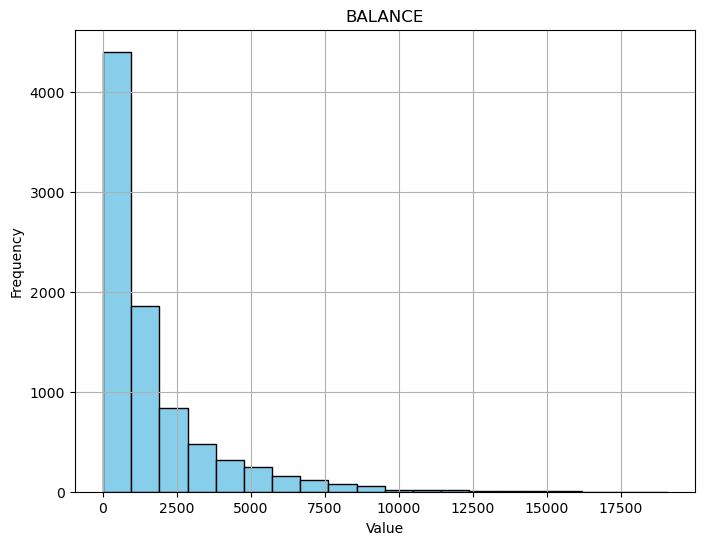

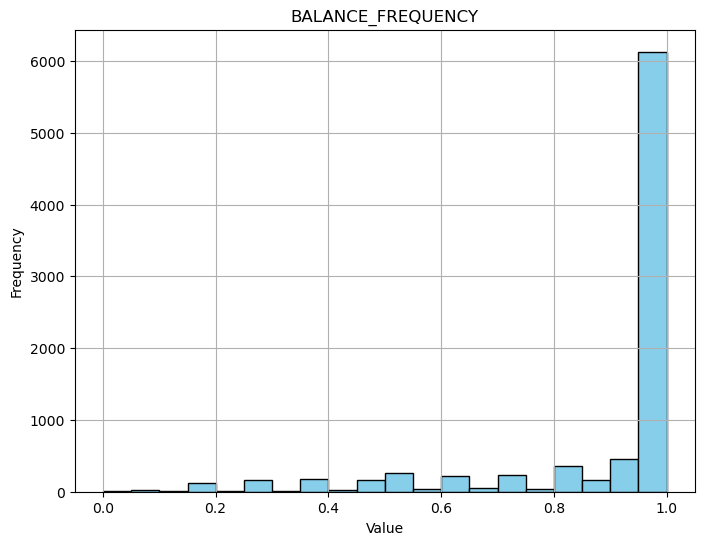

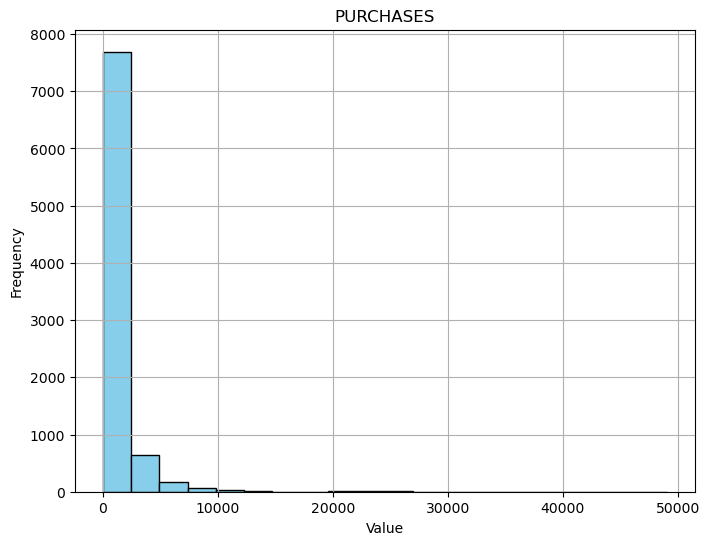

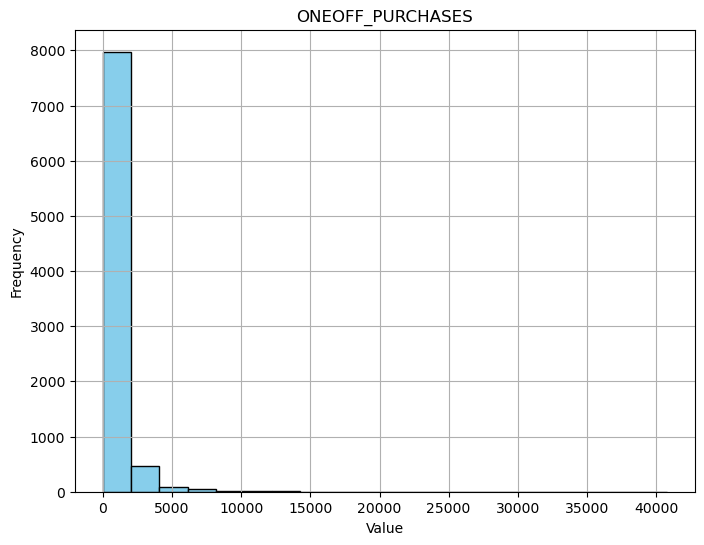

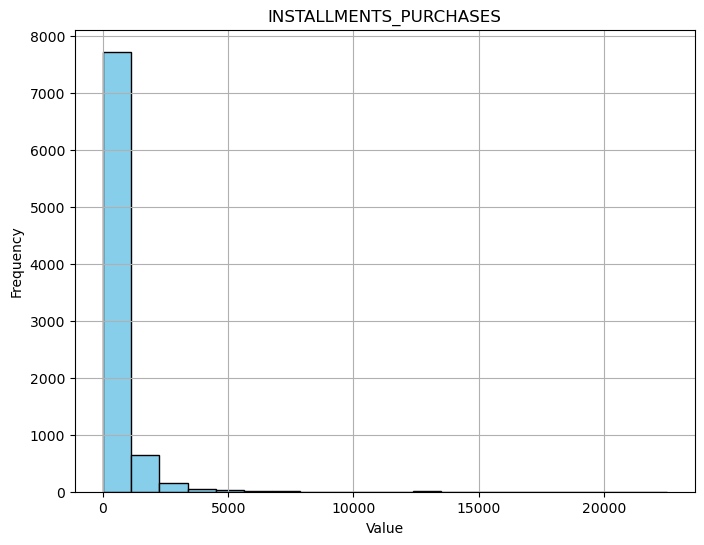

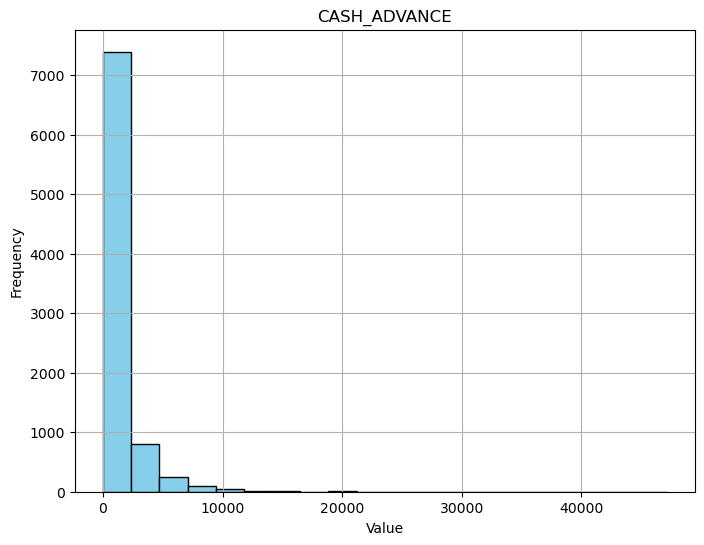

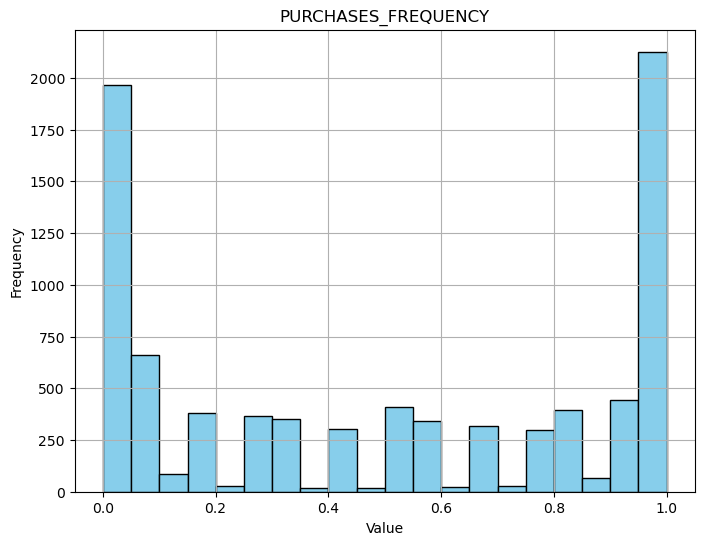

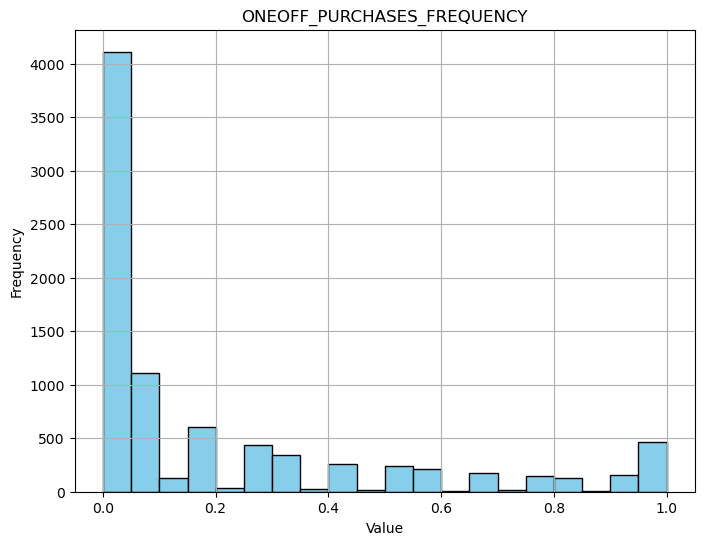

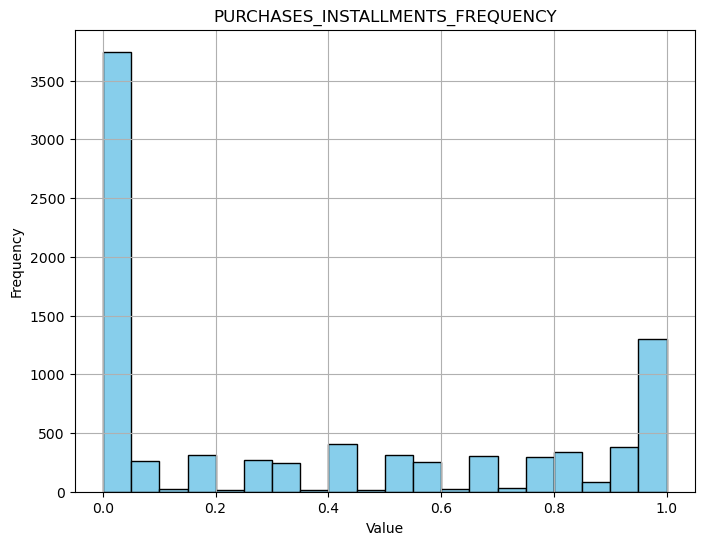

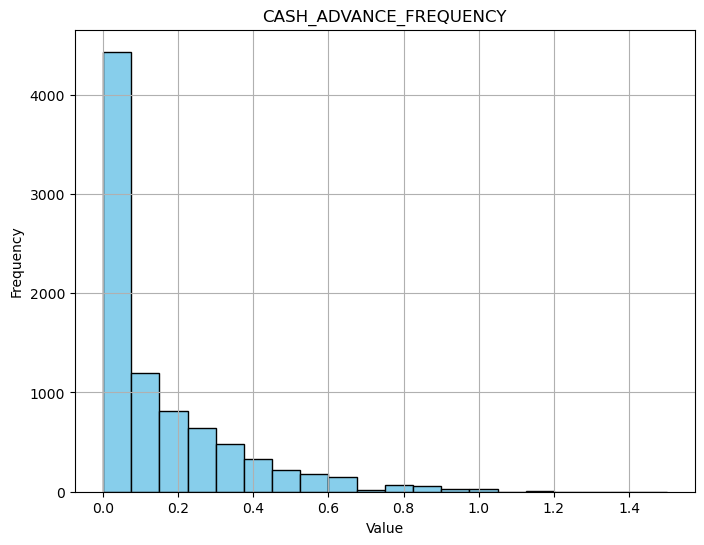

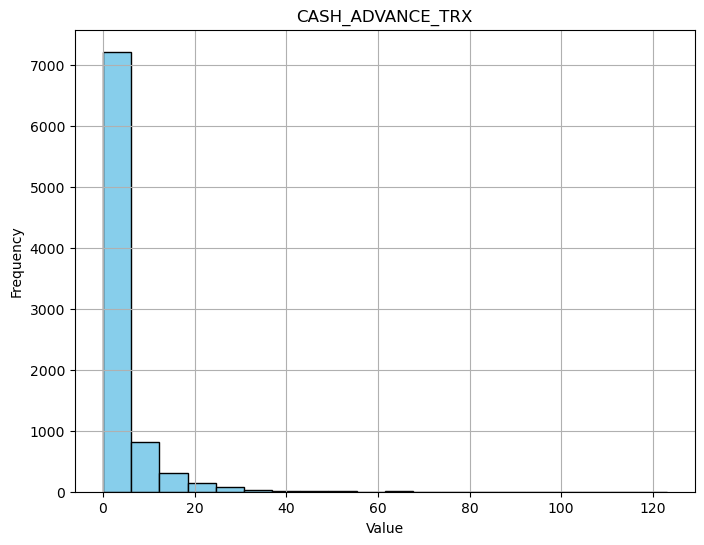

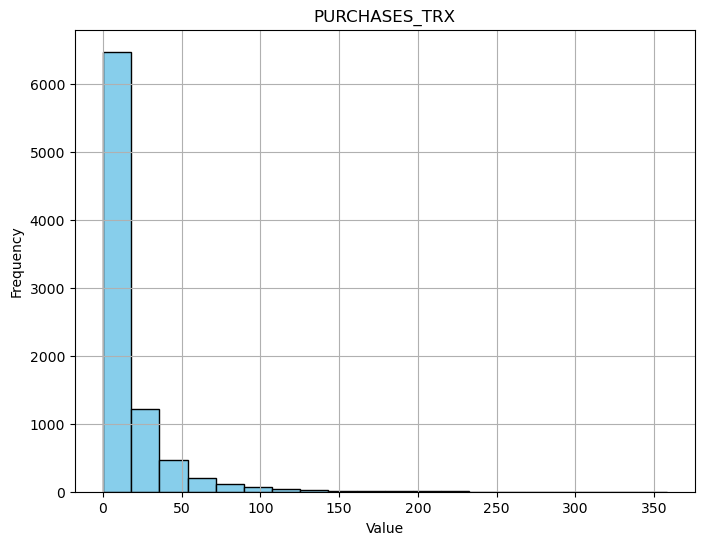

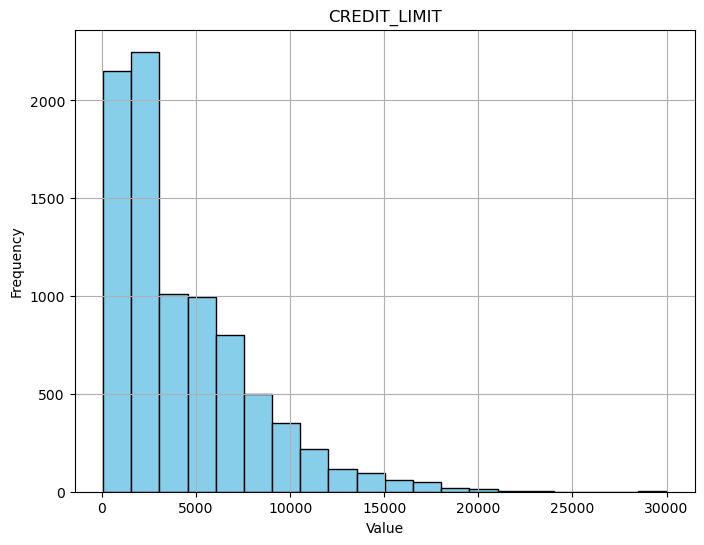

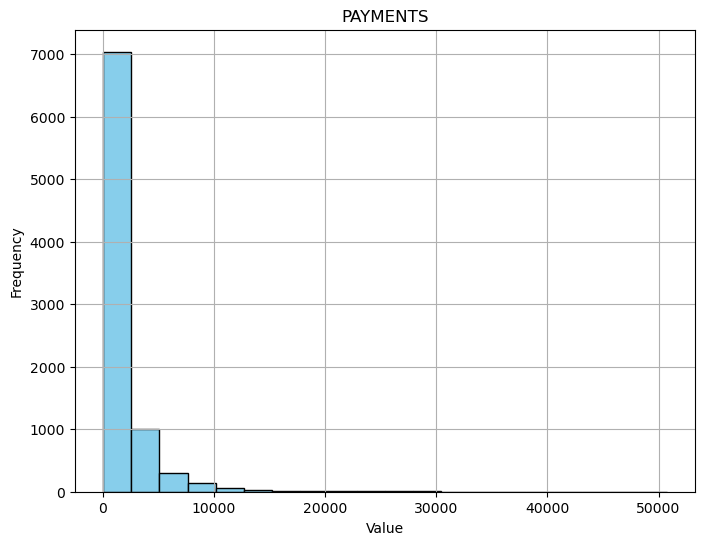

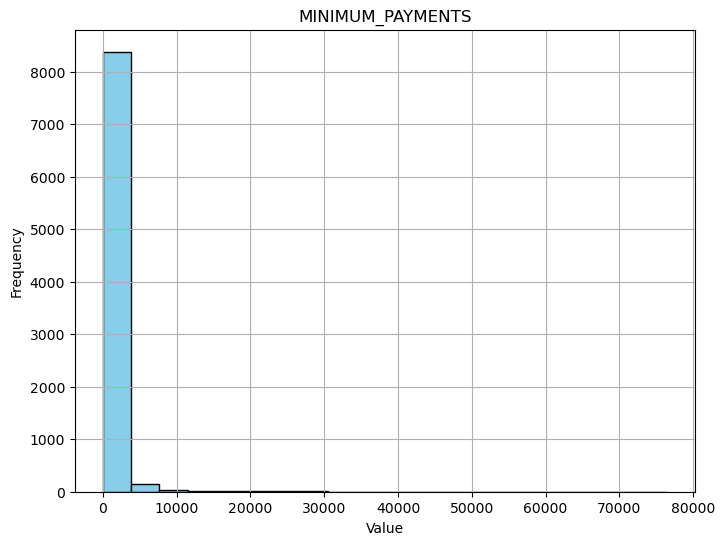

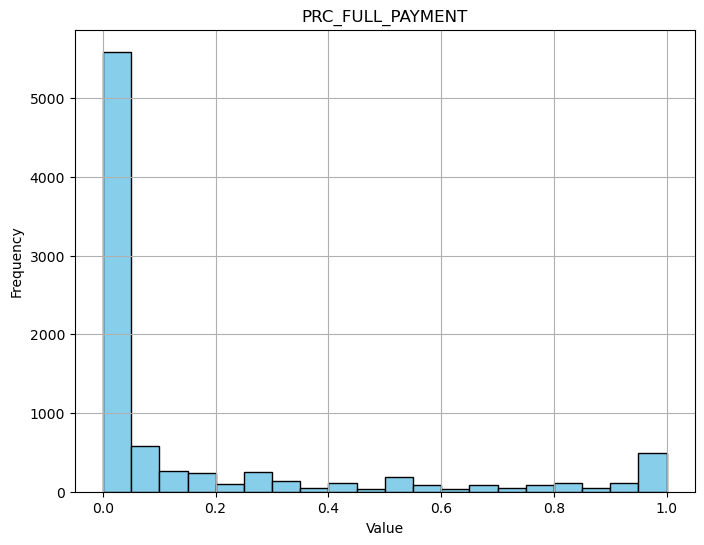

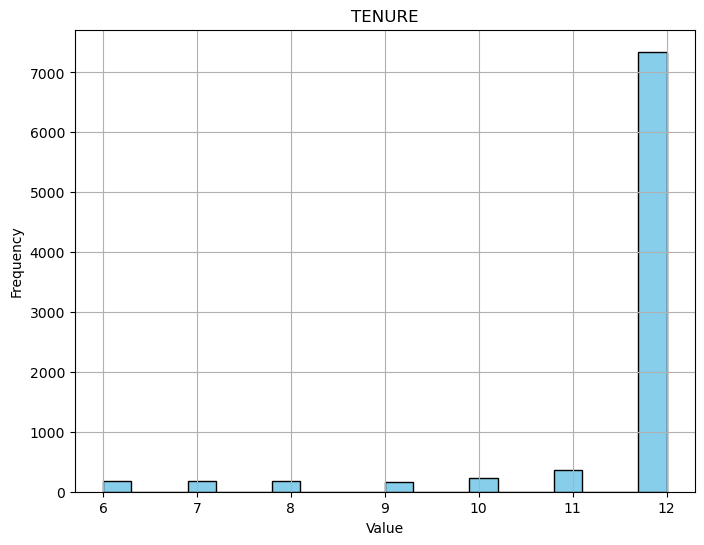

In [16]:
# Get column names from numerical columns
numerical_column_names = df.select_dtypes(include='number').columns.tolist()

numerical_columns = df[numerical_column_names].dropna()
for column in numerical_columns.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(numerical_columns[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

**Key Observations data distribution:**

* **Predominance of Right Skewness:** The majority of our numerical features (balance, purchases, oneoff_purchases, etc.) exhibit right-skewed distributions. This indicates a concentration of lower values with a long tail of higher values. Such patterns often suggest income or spending-related behaviors where most customers likely maintain smaller balances or make less frequent/smaller purchases, while a few have significantly higher balances or spending habits.

* **Left-Skewed Features:** Balance_frequency and tenure display left-skewness. This implies that many customers likely have more frequent balance occurrences and longer tenures, with fewer instances of infrequent balances or shorter tenures.

* **Bimodal Distribution:** The purchase_frequency feature shows a non-symmetric bimodal distribution. This highlights two potential customer groups: one with a higher frequency of purchases and another with a lower frequency.

**Implications for Clustering:**

* **Normalization/Transformation:** The right-skewed features might benefit from normalization or transformation (log, square root) to reduce the impact of outliers and improve clustering performance.

* **Segmentation Potential:** The bimodality of purchase_frequency suggests the potential for creating meaningful customer segments based on purchasing behavior. This could be a valuable feature for cluster separation.

* **Feature Engineering:** Creating additional features could capture insights from the skewed distributions.  For example:
   - Ratios (e.g., balance to credit_limit) to highlight relative indebtedness.


### Identifying and handling outliers